# **LIQUID STATE MACHINE**

---

A liquid state machine or LSM in short, is a machine learning model or system that's part of a series of particular neural network models. These models take on traditional designs to introduce new and innovative ways of recycling information. Like other kinds of neural networks, liquid state machines are grounded around the neurobiology of the human brain. 

However, Liquid State Machine and Echo State machines are complex topics that deal with computational neuroscience, Physics, dynamic action system, and feedback system and machine learning. But In this article, I’ll try to explain this topic in the simplest way possible. At the end of the article, we'll also see simple implementation of Liquid State Machine. So don’t worry. Let’s get started:


# **Key Components of Liquid State Machine**

---

A liquid State Machine (LSM) is a neural model with real-time calculations which transforms the time-varying inputs to an advanced dimensional space. The conception of LSM is a new field of exploration in naturally inspired calculation with utmost exploration trouble on training the model as well as changing the optimum learning system. 

 LSM model was developed from the standpoint of computational neuroscience. An underpinning principle of LSM lies in its capability of 
 performing real-time calculations by transubstantiating the time-varying input sluice into a 
 Advanced dimensional space. LSM has three key factors which are 
 
(i) An input layer

(ii) A reservoir or liquid and,

(iii) A memoryless readout circuit. 

 Utmost executions of Liquid State Machines use the force of neurons untrained. 
 You need to stay at least until you finish giving the input. 
 You can imagine that your liquid complexity is a kernel in SVM that tries to project the data points to some hyperspace. 

 
 


# **Working of LSM**


---


The Bee simulator is an open-source Spiking Neural Network (SNN) simulator, freely available, specialized in Liquid State Machine (LSM) systems with its core functions fully implemented in C.
It was developed exclusively to solve the specific problems presented by neurorobotics experiments.

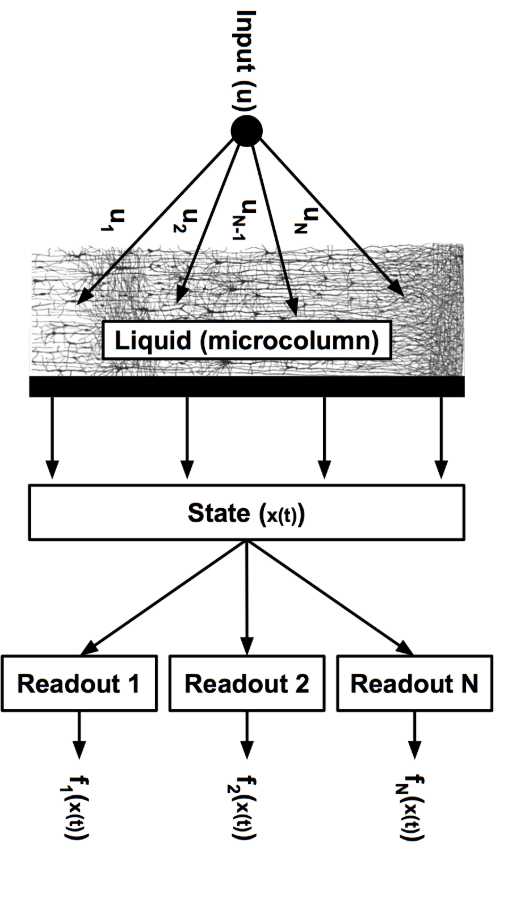




* Bee uses the C library threads (POSIX threads) in order to speed up the simulation of LSMs by processing input and output in a parallel way. To simplify the user interaction with the software, a Python wrapper is being supplied.
* The neuron model, a special type of model(Leaky_integrate-and-fire) with extra exponential synapses is fixed, following what is presented below, and the solution for the differential equations is calculated by Euler's method according to the simulation's time step specified by the user.

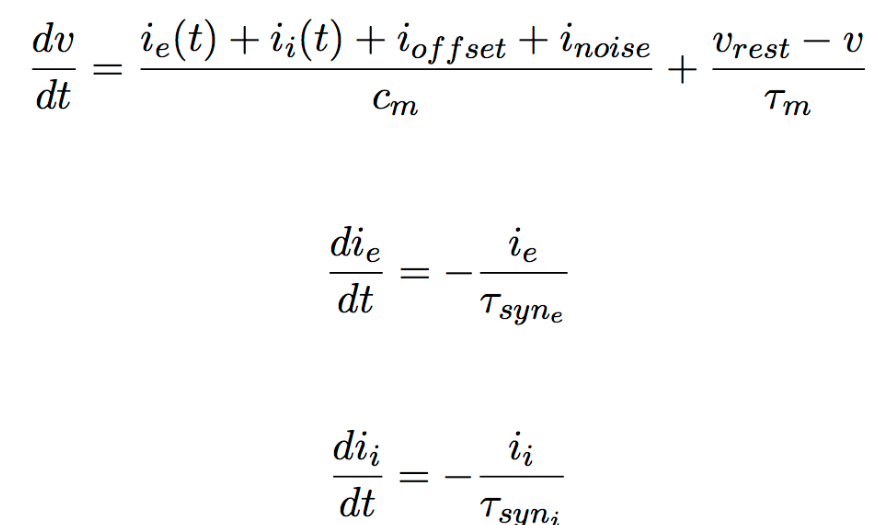

* The simulator automatically generates the liquid(reservoir) in a probabilistic way according to the below equation,

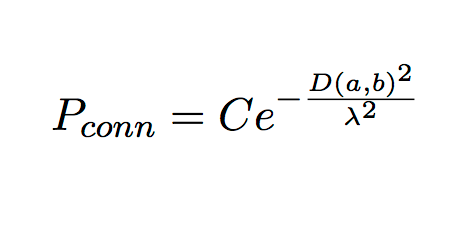


# **Sample Implementation of LSM**

---
First of all, we will import some Python libraries and then implement the LSM class. The LSM class will consist of nodes, strength and axons in the below order:
    
nodes  - N x 1 (activation level)

cm     - N x N x 2 (strength (signed), delay

axons  - N x N list of lists of deques (signal history) deque length determined from timestamps)
  
A connection matrix of None will cause a completely random connection matrix to be initialized. 
Also we need to go over each node and then load the current value of each node into the buffers and update the based on inputs. 
I guess enough theory now. Let's dive into the code now:



In [3]:
import pylab
from collections import deque

class LSM:
  
  def __init__(self, N=100, cm=None, max_n=10):
    
    self.node_count = N
    self.nodes = pylab.zeros(N)
    if cm is not None:
      self.cm = cm
    else:
      self.random_cm()
    self.setup_axons(max_n)

  def random_cm(self):
    N = self.node_count
    self.cm = pylab.zeros((N,N,2))
    self.cm[:,:,0] = pylab.randn(N,N)-.2
    self.cm[:,:,1] = pylab.rand(N,N)+10

  def setup_axons(self, max_n=10):
    N = self.node_count
    L = self.cm[:,:,1]*max_n
    self.axons = [[deque([0]*L[r,c]) for c in xrange(N)] for r in xrange(N)]

  def update(self):
    """Run one step of the simulation."""
    N = self.node_count
    axons = self.axons
    nodes = self.nodes
    cm = self.cm

    
    #Axons that have zero delay have empty buffers: the buffers are unloaded right after they are loaded
    for r in xrange(N): #Source
      for c in xrange(N): #Destination
        axons[r][c].appendleft(nodes[r]*cm[r,c,0])

    #Now go over each node, updating the state based on the inputs
    for c in xrange(N): #Destination
      total_input = 0
      for r in xrange(N): #Source
        total_input += axons[r][c].pop()
      nodes[c] += total_input

    nodes[pylab.find(nodes > 1)] = 1
    nodes[pylab.find(nodes < 0)] = 0


After this you can also visualize the liquid state machine in an intersting way by ploting it using one of the most popular Python library matplotlib and pylab. So let's do that too.

In [4]:
import pylab
from matplotlib import animation

def plot_network(lsm, max_width=10):
  """Passes a liquid state machine show it as a ."""
  nodes = lsm.nodes
  N = lsm.node_count


def animate_network(lsm, buffer_len):
  def animate(frame):
    lsm.update()
    buffer[:,:-1] = buffer[:,1:]
    buffer[:,-1] = lsm.nodes
    im.set_array(buffer)
    return im, fig.suptitle(frame)

  buffer = pylab.zeros((lsm.node_count,buffer_len))

  fig = pylab.figure()
  im = pylab.imshow(buffer, vmin=0, vmax=1, cmap=pylab.cm.gray, interpolation='none')

  anim = animation.FuncAnimation(fig, animate,
                                 frames=500, interval=20, repeat=False, blit=True)
  return anim

# **Conclusion**

---
LSM is a neural model with real time calculations which transforms the time varying 
 inputs to a advanced dimensional space. LSM has three pivotal factors which 
 are an input subcaste, a force or liquid and a memoryless readout circuit. In this 
 article, I tried to discuss discuss the simplest structure of the LSM models that depicts optimum performance is achieved when it's operated in its real
 suggested state. I hope this article gives you plentiful insights on the topic of LSM.
 
 Thank You!